# Equation of State and Phase Transition

Phase transitions can be triggered by different external stimuli like change in temperature, pressure or a combination of both. If we want to evaluate a pressure induced phase transition we need to study the behavior in compression of two different phases involved through two EOS calculations. Starting from the two output we can then evaluate the data through CRYSTALClear.

In [1]:
# Import of the necessary packages 
from CRYSTALClear.crystal_io import Crystal_output
import CRYSTALClear.plot as CCplt
import matplotlib.pyplot as plt

# Definition of files associated with the two phases of the system of interest
LP_phase = 'TaAs_lda_EOS_ext_restart2.out'
HP_phase = 'hTaAs_lda_EOS_ext_restart2.out'

phases = [LP_phase, HP_phase]

### Reading the Outputs

The first step in the process of evaluating the phase transition is to read and extrarct the relevant information from the output files of the two phases involved in the transition.

In [2]:
# Output file read
for phase, file in enumerate(phases):
    phases[phase] = Crystal_output(file).get_EOS()

### Plotting the Data

Now, to proceed with our evaluation we have two possible routes:
1. To use the volumes and energy computed by <span style="font-variant: small-caps;">Crystal</span> in each step of the EOS calculation
2. To use the results the Enthalpy of the system at each pressure as computed with through any of the four Equation of State considered in the CRYSTAL output (Murnaghan, Birch-Murnaghan, Poirier-Tarantola, and Vinet) 

#### 1. Volume vs Energy

As said, following the first route we will consider the volumes and energies comuted by <span style="font-variant: small-caps;">Crystal</span> for each of the constant volume optimization performed in the EOS calculation. **It is worth nothing here that both volumes and energies require to be normalized by the number of formula unit present in the cell.** This is also the default option CRYSTALClear will use.

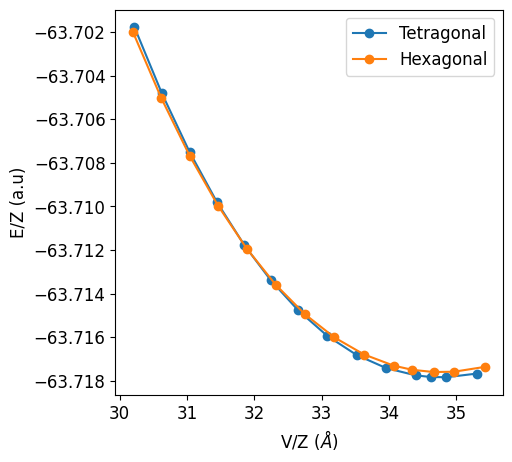

In [4]:
# Plotting computed Volumes against computed Energies
CCplt.plot_cry_EOS(phases, formula_unit=(2,1), legend=['Tetragonal', 'Hexagonal'], dpi=100)

plt.show()

In this case the Pressure at which the phase transition will occur is the determined by the **slope of the common tangent of the two curves**.

#### 2. Pressure vs Enthalpy

A more direct way to determine the phase transition pressure is through the evaluation of the [Equation of State](https://tutorials.crystalsolutions.eu/tutorial.html?td=eos&tf=eos_tut), which allows us to plot the evolution of the system enthalpy as function of pressure. For this purpose we will use the ***Birch-Murnaghan*** equation of state:

$$\mathrm{E(V)}=\mathrm{E}_{0}+\frac{9\mathrm{V}_{0}\mathrm{B}_{0}}{16}\left\{\left[\left(\frac{\mathrm{V}_{0}}{\mathrm{V}}\right)^{\frac{2}{3}}-1\right]^{3}\mathrm{B}_{0}^{\prime}+\left[\left(\frac{\mathrm{V}_{0}}{\mathrm{V}}\right)^{\frac{2}{3}}-1\right]^{2}\left[6-4\left(\frac{\mathrm{V}_{0}}{\mathrm{V}}\right)^{\frac{2}{3}}\right]\right\}$$

which can also be used to compute the pressure though the $P(V) = \left(\frac{\partial E}{\partial V}\right)_V$ relation:

$$ \mathrm{P}(\mathrm{V})=\frac{3\mathrm{B}_0}{2}\left[\left(\frac{\mathrm{V}_0}{\mathrm{V}}\right)^{\frac{7}{3}}-\left(\frac{\mathrm{V}_0}{\mathrm{V}}\right)^{\frac{5}{3}}\right]\left\{1+\frac{3}{4}(\mathrm{B}_0^{\prime}-4)\left[\left(\frac{\mathrm{V}_0}{\mathrm{V}}\right)^{\frac{2}{3}}-1\right]\right\}.$$

Where $\mathrm{B_0}$ and $\mathrm{B_0'}$ identify the equilibrium bulk modulus and its first derivative with respect to pressure, respectively, and $\mathrm{V}$ is the volume. It is then possible to compute the Enthalpy of the system ($\mathrm{H}$), which at 0 K conicides with the Gibbs free energy ($\mathrm{G}$), as:

$$ \mathrm{H(V)=E(V)+P(V)\times V~.} $$

Once the entalpies associated with each phase are normalized by their corresponding formula unit we an proceed and take the difference in enthalpy between the two at each pressure, in our case: 
$$ \Delta \mathrm{H} = \mathrm{H}_{tetragonal} - \mathrm{H}_{hexagonal} $$
and proceed with to plot the results

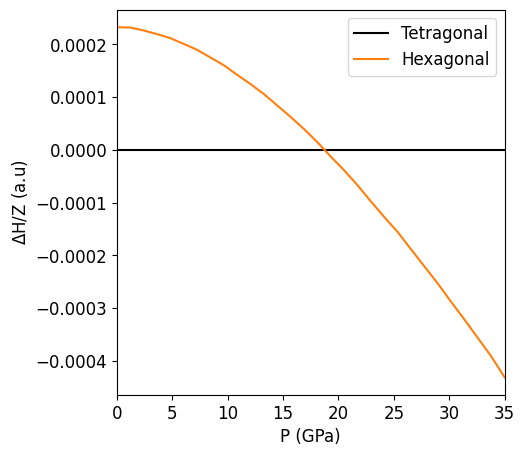

In [5]:
# Plot Birch-Murnaghan Pressure vs Enthalpy
CCplt.plot_cry_EOS(phases, plot='Birch-Murnaghan', formula_unit=[2,1], legend=['Tetragonal', 'Hexagonal'], dpi=100)

# Delimiting the range of pressure considered
plt.xlim(0, 35)

plt.show()

The pressure at which the phase transition will occure is the one at which the **difference in enthalpy between the hexagonal and tetragonal phase becomes negative**. In other words the pressure at which the orange line crosses the black one.